In [2]:
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm.auto import tqdm

from ddim import BayesPredictor, CNNPredictor, Diffusion, create_alpha_schedule
from mnist_train import create_datasets

In [3]:
diffusion = Diffusion(
    create_alpha_schedule(num_steps=100, beta_0=0.001, beta_T=0.2)
)

In [4]:
def load_trained_model():
    model = CNNPredictor((1, 28, 28))
    model.load_state_dict(torch.load('checkpoints/mnist_model.pt'))
    return model

cnn_model = load_trained_model()

In [5]:
def load_test_data():
    _, loader = create_datasets(10000, False)
    batch = next(iter(loader))[0]
    return batch.numpy()

test_data = load_test_data()

In [6]:
def show_sample(sample):
    image = sample*0.3081 + 0.1307
    image = (image * 255).clip(0, 255).astype('uint8')
    image = image.reshape([4, 4, 1, 28, 28]).transpose(0, 3, 1, 4, 2).reshape([28*4, 28*4, 1])
    image = np.concatenate([image] * 3, axis=-1)
    display(Image.fromarray(image))

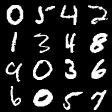

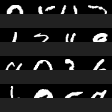

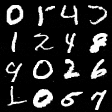

In [11]:
latents = np.random.normal(size=[16, 1, 28, 28])
images = test_data[:16]
image_mask = np.ones_like(images)
image_mask[:, :, 14:] = 0
show_sample(images)
show_sample(images*image_mask)

samples = diffusion.ddpm_sample_cond_energy_inpaint(
    latents, cnn_model, images, image_mask, temp=1.0, eps=1e-2
)
show_sample(images*image_mask + samples*(1-image_mask))

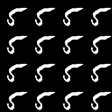

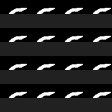

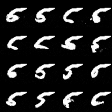

In [12]:
latents = np.random.normal(size=[16, 1, 28, 28])
images = np.tile(test_data[14:15], [16, 1, 1, 1])
image_mask = np.ones_like(images)
image_mask[:, :, 14:] = 0
show_sample(images)
show_sample(images*image_mask)

samples = diffusion.ddpm_sample_cond_energy_inpaint(
    latents, cnn_model, images, image_mask, temp=1.0, eps=1e-2
)
show_sample(images*image_mask + samples*(1-image_mask))